In [1]:
import pandas as pd
df = pd.read_pickle('data/intersection_of_visits.pkl')

Filter and explode the dataframe so that it shows all sendBeacon calls as seperate rows.

In [2]:
def create_list(row):
    if row:
        if row['savedCalls']:
            return row['savedCalls']
    return [{}]

df_exploded = df.copy()
df_exploded['apis'] = df_exploded['apis'].map(lambda x: create_list(x))
df_exploded = df_exploded.explode('apis')

df_filtered = df_exploded.drop(['finalUrl', 'cmps', 'requests', 'cookies', 'targets'], axis=1)

display(df_filtered)

,initialUrl,apis,autoconsent_action
0,http://tradplusad.com/,{},optIn
1,http://alexa.com/,{},optIn
2,http://bstatic.com/,{'source': 'https://cf.bstatic.com/static/js/m...,optIn
2,http://bstatic.com/,{'source': 'https://www.googletagmanager.com/g...,optIn
2,http://bstatic.com/,{'source': 'https://www.googletagmanager.com/g...,optIn
...,...,...,...
9615,http://qortex.ai/,{'source': 'https://www.googletagmanager.com/g...,optOut
9616,http://sothebys.com/,{},optOut
9617,http://mozilla.org/,{'source': 'https://www.googletagmanager.com/g...,optOut
9617,http://mozilla.org/,{'source': 'https://www.googletagmanager.com/g...,optOut


Here is a list of all object types found in the sendBeacon calls, then the dataframe gets mapped for every object type so we can see what row contains what object type.

In [3]:
df_object_types = df_filtered.copy()

object_types = [
    '[object Blob]',
    '[object FormData]',
    '[object Object]',
    '[object SVGSVGElement]',
    '[object SVGPathElement]',
    '[object HTMLSpanElement]',
    '[object HTMLButtonElement]',
    '[object SVGPathElement]',
    '[object HTMLDivElement]',
    '[object HTMLImageElement]',
    '[object Text]',
    '[object HTMLLIElement]',
    '[object HTMLUListElement]',
    '[object HTMLHeadingElement]',
    '[object HTMLParagraphElement]',
    '[object HTMLIFrameElement]',
    '[object HTMLInputElement]',
    '[object HTMLScriptElement]',
    '[object HTMLLinkElement]',
    '[object HTMLMetaElement]',
    '[object HTMLElement]',
    '[object HTMLStyleElement]',
    '[object HTMLObjectElement]',
    '[object HTMLHeadElement]',
    '[object CustomEvent]',
    '[object Comment]',
    '[object HTMLFieldSetElement]',
    '[object HTMLTrackElement]',
    '[object HTMLOptionElement]',
    '[object HTMLVideoElement]',
    '[object DocumentFragment]',
    '[object HTMLTableElement]',
    '[object HTMLTableRowElement]',
    '[object HTMLSourceElement]',
    '[object HTMLPictureElement]',
    '[object HTMLBodyElement]',
    ]

def argument_contains(row, object_string):
    if row['apis'] == {}:
        return False
    arguments = row['apis']['arguments']
    for argument in arguments:
        if argument == object_string:
            return True
    return False

for object_type in object_types:
    df_object_types[object_type] = df_object_types.apply(lambda x: argument_contains(x, object_type), axis=1)

display(df_object_types)

,initialUrl,apis,autoconsent_action,[object Blob],[object FormData],[object Object],[object SVGSVGElement],[object SVGPathElement],[object HTMLSpanElement],[object HTMLButtonElement],...,[object HTMLFieldSetElement],[object HTMLTrackElement],[object HTMLOptionElement],[object HTMLVideoElement],[object DocumentFragment],[object HTMLTableElement],[object HTMLTableRowElement],[object HTMLSourceElement],[object HTMLPictureElement],[object HTMLBodyElement]
0,http://tradplusad.com/,{},optIn,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,http://alexa.com/,{},optIn,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,http://bstatic.com/,{'source': 'https://cf.bstatic.com/static/js/m...,optIn,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,http://bstatic.com/,{'source': 'https://www.googletagmanager.com/g...,optIn,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,http://bstatic.com/,{'source': 'https://www.googletagmanager.com/g...,optIn,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9615,http://qortex.ai/,{'source': 'https://www.googletagmanager.com/g...,optOut,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9616,http://sothebys.com/,{},optOut,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9617,http://mozilla.org/,{'source': 'https://www.googletagmanager.com/g...,optOut,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9617,http://mozilla.org/,{'source': 'https://www.googletagmanager.com/g...,optOut,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
# - nr sendBeacon calls containing object

nr_calls_containing_object_optIn = []
nr_calls_containing_object_optOut = []

for object_type in object_types:
    nr_calls_containing_object_optIn.append(df_object_types[df_object_types['autoconsent_action'] == 'optIn'][object_type].values.sum())
    nr_calls_containing_object_optOut.append(df_object_types[df_object_types['autoconsent_action'] == 'optOut'][object_type].values.sum())

# - nr of visits containing any object

def contains_any_object(frame):
    for object_type in object_types:
        if True in frame[object_type].values:
            return True
    return False

nr_objects_optIn = df_object_types[df_object_types['autoconsent_action'] == 'optIn'].groupby(['initialUrl']).apply(lambda frame: contains_any_object(frame)).sum()
nr_objects_optOut = df_object_types[df_object_types['autoconsent_action'] == 'optOut'].groupby(['initialUrl']).apply(lambda frame: contains_any_object(frame)).sum()

print("optIn has: " + str(nr_objects_optIn) + " visits containing objects")
print("optOut has: " + str(nr_objects_optOut) + " visits containing objects")

# - nr of visits containing each object type

object_counts_optIn = [0]*len(object_types)
object_counts_optOut = [0]*len(object_types)

def get_object_counts(frame, object_counts):
    for i, object_type in enumerate(object_types):
        if True in frame[object_type].values:
            object_counts[i] += 1

df_object_types[df_object_types['autoconsent_action'] == 'optIn'].groupby(['initialUrl']).apply(lambda frame: get_object_counts(frame, object_counts_optIn))
df_object_types[df_object_types['autoconsent_action'] == 'optOut'].groupby(['initialUrl']).apply(lambda frame: get_object_counts(frame, object_counts_optOut))

print(object_types)
print(object_counts_optIn)
print(object_counts_optOut)

optIn has: 1667 visits containing objects
optOut has: 1448 visits containing objects
['[object Blob]', '[object FormData]', '[object Object]', '[object SVGSVGElement]', '[object SVGPathElement]', '[object HTMLSpanElement]', '[object HTMLButtonElement]', '[object SVGPathElement]', '[object HTMLDivElement]', '[object HTMLImageElement]', '[object Text]', '[object HTMLLIElement]', '[object HTMLUListElement]', '[object HTMLHeadingElement]', '[object HTMLParagraphElement]', '[object HTMLIFrameElement]', '[object HTMLInputElement]', '[object HTMLScriptElement]', '[object HTMLLinkElement]', '[object HTMLMetaElement]', '[object HTMLElement]', '[object HTMLStyleElement]', '[object HTMLObjectElement]', '[object HTMLHeadElement]', '[object CustomEvent]', '[object Comment]', '[object HTMLFieldSetElement]', '[object HTMLTrackElement]', '[object HTMLOptionElement]', '[object HTMLVideoElement]', '[object DocumentFragment]', '[object HTMLTableElement]', '[object HTMLTableRowElement]', '[object HTMLSour

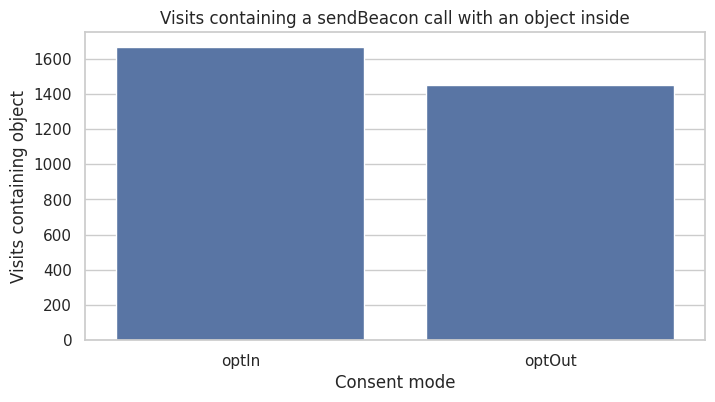

[1667, 1448]


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

sums = [nr_objects_optIn, nr_objects_optOut]
labels = ['optIn', 'optOut']
f, ax = plt.subplots(figsize=(8,4))
sns.barplot(y=sums, x=labels)
plt.title("Visits containing a sendBeacon call with an object inside")
ax.set(ylabel="Visits containing object", xlabel="Consent mode")
plt.show()
print(sums)

,object_types,count,mode
0,[object Blob],1512,optIn
1,[object FormData],179,optIn
2,[object Object],30,optIn
3,[object HTMLScriptElement],6,optIn
4,[object HTMLDivElement],5,optIn
5,[object Blob],1306,optOut
6,[object FormData],160,optOut
7,[object Object],28,optOut
8,[object HTMLScriptElement],5,optOut
9,[object HTMLDivElement],6,optOut


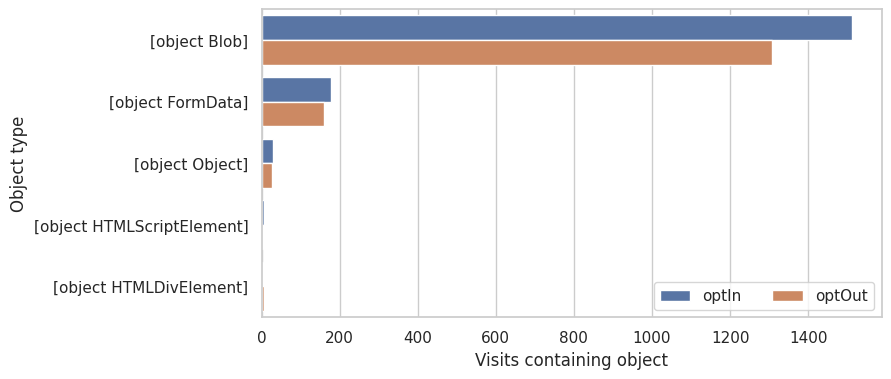

In [6]:
object_type_graph_data = {}

for i, object_type in enumerate(object_types):
    object_type_graph_data[object_type] = (object_counts_optIn[i], object_counts_optOut[i])

first_items = list(reversed(sorted(object_type_graph_data.items(), key=lambda item: item[1][0])))[:5]

import operator
keys = list(map(operator.itemgetter(0), first_items))
optIn = list(map(operator.itemgetter(0), list(map(operator.itemgetter(1), first_items))))
optOut = list(map(operator.itemgetter(1), list(map(operator.itemgetter(1), first_items))))

data_graph = {
    'object_types': keys+keys,
    'count': optIn+optOut,
    'mode': ['optIn']*5+['optOut']*5,
}
df_graph = pd.DataFrame(data_graph)
display(df_graph)
f, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='count', y='object_types', hue='mode', data=df_graph)
ax.set_xlabel("Visits containing object")
ax.set_ylabel("Object type")
ax.legend(ncol=2, loc="lower right", frameon=True)
plt.show()